## Decay Rates

In [1]:
%matplotlib inline

In [2]:
import os,sys
sys.path.append('./bubbles_codes/')
from plotting import *
from bubble_tools import *
from experiment import *


In [3]:
%run './bubbles_codes/plotting.py'

In [4]:
# standardize plots
lsl = lambda tmp: ('-' if tmp%4==0 else '-.' if tmp%4==1 else '--' if tmp%4==3 else ':')


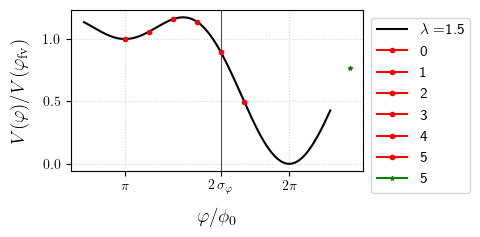

In [5]:
if True:
    for tmp in [0]:
        phi0, lamb, sigmafld, minSim, maxSim, right_Vmax, normal = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])

        philist = np.linspace(0.75*np.pi, 2.25*np.pi, 10000)

        fig, ax = plt.subplots(1, 1, figsize=(5, 2.5))
       # ax.plot(philist, phi0**2.*V(philist, lamb), label=r'$\lambda=$'+str(lamb), color='k')
        ax.plot(philist, V(philist, lamb)/V(np.pi, lamb), label=r'$\lambda=$'+str(lamb), color='k')
       # ax.axvline(right_Vmax.x, ls='-', color='k', linewidth=0.5)
        ax.axvline((4.*sigmafld+np.pi), ls='-', color='k', linewidth=0.5)
        for nn in np.linspace(0, 5, 6):
            ax.plot(np.pi + nn*sigmafld, V(np.pi + nn*sigmafld, lamb)/V(np.pi, lamb), \
                    marker='o', ms=3, color='r', label=int(nn))
        ax.plot(np.pi + phi0/sigmafld, V(np.pi + phi0/sigmafld, lamb)/V(np.pi, lamb), \
                marker='*', ms=3, color='g', label=int(nn))

        ax.set_xlabel(r'$\varphi/\phi_0$', labelpad = 10)
        ax.set_ylabel(r'$V(\varphi)/V(\varphi_{\rm fv})$', labelpad = 10)
        ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi))
        ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))

        a = ax.get_xticks().tolist()[1:]
        a[2] = a[1]
        a[1] = (4.*sigmafld+np.pi)#right_Vmax.x
        ax.set_xticks(a)
        a[0] = r'$\pi$'
        a[1] = r'${:.0f}$'.format((right_Vmax.x-np.pi)/sigmafld)+r'$\, \sigma_\varphi$'
        a[2] = r'$2\pi$'
        ax.set_xticklabels(a)

        ax.grid(ls=':', color='darkgray', alpha=0.5)
        plt.legend(bbox_to_anchor=(1., 1))
       # plt.savefig('./plots/potential.pdf', dpi=500)
        plt.tight_layout()
        plt.show()


In [6]:
if False:
    for tmp in [0]:
        phi0, lamb, sigmafld, minSim, maxSim, right_Vmax, normal = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])

        def fun(y, x):
            Φ, Π = y
            #dydx = [Π, -Π/x+(np.sin(Φ) + 0.5*lamb**2.*np.sin(2.*Φ))*4.*nu]
            # no friction term in thermal case
            dydx = [Π, +(np.sin(Φ) + 0.5*lamb**2.*np.sin(2.*Φ))*4.*nu]
            return dydx

        #y0 = [5.69219082899233042025, 0.] # with friction
        y0 = [4.823729806624866, 0.] # supercrit_instanton_file
        
        # as far as fortran goes:
             #4.8238 is super-critical
             #4.823729806620144 is sub-critical
            
        #y0 = [4.823729806625, 0.] # instanton_file

        x     = np.linspace(0, lenLat, 1000)
        xplot = np.linspace(np.pi*0.8, 2.*np.pi, 1000)
        sol   = odeint(fun, y0, x)

        plt.plot(x*np.sqrt(m2(lamb)), sol[:, 0], ls='-', label=r'$\phi(x)$')
        plt.axhline(np.pi, ls=':', color='darkgray')
        plt.legend(); plt.show()

        plt.plot(xplot, Vinv(xplot, lamb), label='V', linewidth='1', alpha=0.3)
        plt.plot(sol[:, 0], Vinv(sol[:, 0], lamb))
        plt.legend(); plt.show()

        ind  = np.argmin(np.abs(sol[:,0] - np.pi)); print(ind, sol[ind,0])
        inst = np.ones(nLat//2+1) * phieq
        inst[:ind+1] = sol[:ind+1, 0]
        inst = np.concatenate((inst[::-1],inst[1:-1]))
        print(np.argmax(inst))
        
       # np.save(supercrit_instanton_file(*exp_params), inst)

        plt.plot(np.arange(nLat)-nLat//2, inst); plt.show()
        print('Instanton saved.')

Sim, nT, outcome 409 2667 1


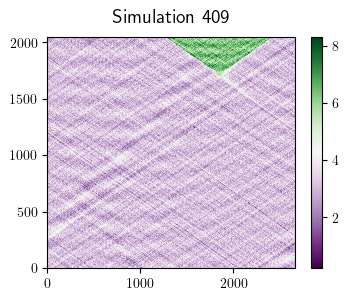

Sim, outcome0, outcome1, tdecay 409 1 1 2326


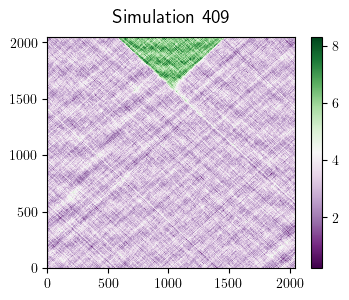

In [7]:
if True:
    tmp = 0
    phi0, lamb, sigmafld, minSim, maxSim, right_Vmax, normal = get_model(tmp)
    exp_params = np.asarray([nLat, lamb, phi0, temp])

    undecayed_sims = np.load(sims_notdecayed_file(*exp_params, minSim, maxSim, nTimeMAX))
 #   print(undecayed_sims[:,0])

    decay_times  = np.load(decay_times_file(*exp_params, minSim, maxSim, nTimeMAX))

    minDecTime  = nLat//10
    alltimes    = decay_times[:,1]
    simList2Do  = decay_times[alltimes>=minDecTime, 0]
 #   print(simList2Do)

    sims_decayed = np.load(sims_decayed_file(*exp_params, minSim, maxSim, nTimeMAX))

    #choose = random.sample(undecayed_sims[:,0].tolist(), 1)
    choose = random.sample(sims_decayed[:,0].tolist(), 1)
    for sim in choose:
        path2sim = sim_location(*exp_params, sim)
        
        real, cho = get_realisation(nLat, sim, phieq, path2sim)
        nC, nT, nN = np.shape(real)
        print('Sim, nT, outcome', sim, nT, cho)

        bubble = real[0,:]#nT-3*nLat//4]
        nT, nN = np.shape(bubble)
        ax1 = simple_imshow(bubble, [0,nT,0,nN], 'Simulation '+str(sim))
        plt.show()
        
        if False:
            fftbubble = np.fft.fft2(bubble)
            nT, nN = np.shape(fftbubble)
            #fftbubble = fftbubble[:nT//2,:nN//2]
            fftbubble[:, nN*4//10:nN*6//10+1] = 0.
            ax2 = simple_imshow(np.log(fftbubble.real), [0,nT,0,nN], 'Simulation '+str(sim))

            bubble2 = np.fft.ifft2(fftbubble)
            nT, nN = np.shape(bubble2)
            ax3 = simple_imshow(bubble2.real, [0,nT,0,nN], 'Simulation '+str(sim))
            ax4 = simple_imshow(bubble2.imag, [0,nT,0,nN], 'Simulation '+str(sim))

            ax5 = simple_imshow(bubble2.real-bubble, [0,nT,0,nN], 'Simulation '+str(sim))

        if sim in sims_decayed[:,0]:
            path2CLEANsim = clean_sim_location(*exp_params, sim)
            real, sim, tdecay, outcome = np.load(path2CLEANsim)

            bubble = real[0,-nLat:]
            nT, nN = np.shape(bubble)
            simple_imshow(bubble, [0,nT,0,nN], 'Simulation '+str(sim))
            print('Sim, outcome0, outcome1, tdecay', sim, outcome, cho, tdecay)


568
568


/cm/shared/apps/python/python37/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterize" which is no longer supported as of 3.3 and will become an error in 3.6


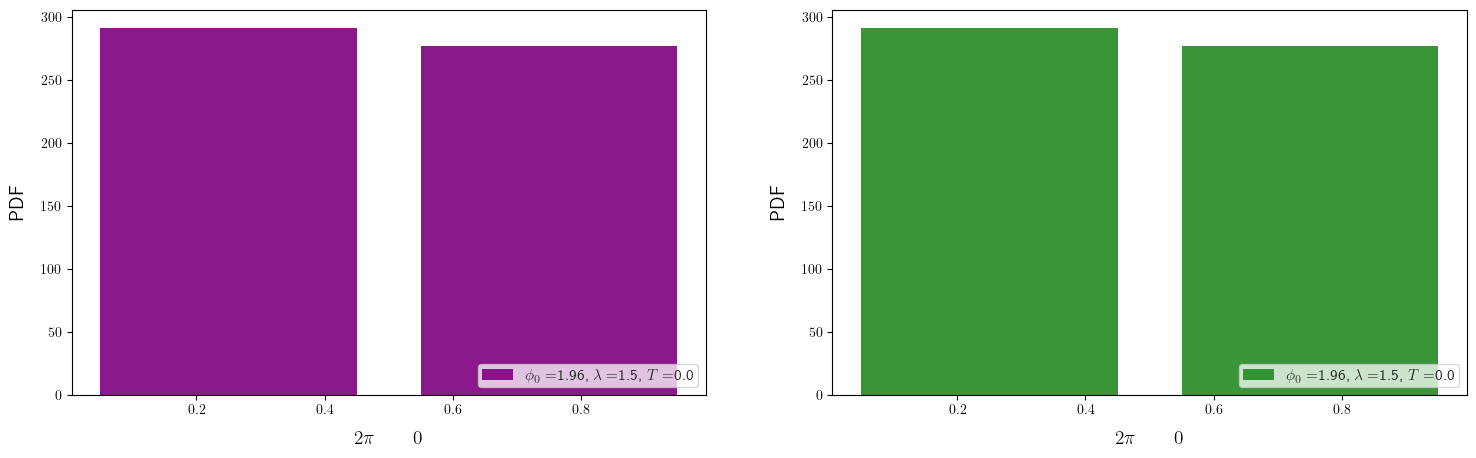

In [8]:
# Classify decays
fig, ax = plt.subplots(1, 2, figsize = (18,5))
plt.style.use('seaborn-whitegrid') # nice and clean grid
cols = cycle(['purple', 'forestgreen', 'orange', 'blue'])

for tmp in range(len(ax)):
    phi0, lamb, sigmafld, minSim, maxSim, right_Vmax, normal = get_model(tmp)
    exp_params = np.asarray([nLat, lamb, phi0, temp])

    undecayed_sims = np.load(sims_notdecayed_file(*exp_params, minSim, maxSim, nTimeMAX))
    decayed_sims = np.load(sims_decayed_file(*exp_params, minSim, maxSim, nTimeMAX))
    decay_times = np.load(decay_times_file(*exp_params, minSim, maxSim, nTimeMAX))

    outcomes = decayed_sims[:,1]; print(len(outcomes))

    labs = labl(lamb, phi0, temp)
    ax[tmp].hist(outcomes, density=False, bins=2, rwidth=0.8, color=next(cols), alpha=0.9, linewidth=0.5, label=labs)
    ax[tmp].set_xlabel(r'$2\pi \quad\quad 0$')
    ax[tmp].set_ylabel('PDF')
    ax[tmp].legend(loc=4, fancybox=True, frameon=True, framealpha=0.75, borderpad=0.3)
plt.savefig('./plots/vacuum_choice.pdf', rasterize=True); plt.show()


In [21]:
bubbleList, velocitesList, instantonList, tmpList, fldcritList, tcritList, encritList = [], [], [], [], [], [], []
for tmp in [0,1]:
    phi0, lamb, sigmafld, minSim, maxSim, right_Vmax, normal = get_model(tmp)
    exp_params = np.asarray([nLat, lamb, phi0, temp])

    bubbleList.append(np.load(average_file(*exp_params)))
    velocitesList.append(np.load(velocities_file(*exp_params)))
    instantonList.append(np.load(supercrit_instanton_file(*exp_params)))
    tmpList.append(tmp)
    fldcritList.append(np.load(critfield_file(*exp_params)))
    tcritList.append(np.load(crittimes_file(*exp_params)))
    encritList.append(np.load(critenerg_file(*exp_params)))


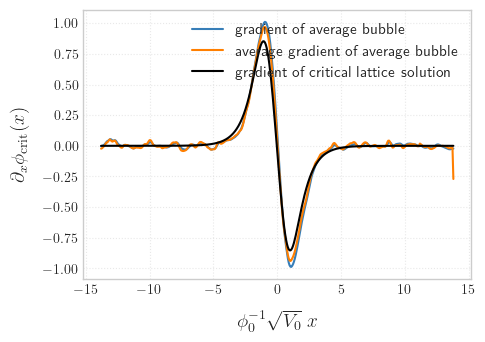

In [22]:
tmp = tmpList[0]
phi0, lamb, sigmafld, minSim, maxSim, right_Vmax, normal = get_model(tmp)

instanton = instantonList[tmp]
gradinst  = (np.roll(instanton,-1) - instanton)/dx2plot

testgrd = fldcritList[tmp][-1,:]*dx/dx2plot

testfld = fldcritList[tmp][0,:]
testfld = (np.roll(testfld,-1) - testfld)/dx2plot

xtest = (np.arange(nLat) - nLat//2) * dx2plot
cds   = np.array(np.linspace(nLat//2-len(testgrd)//2, nLat//2+len(testgrd)//2, len(testgrd)), dtype='int')

fig, ax = plt.subplots(1, 1, figsize = (5,3.5))
ax.plot(xtest[cds], testgrd, ls='-', label='gradient of average bubble')
ax.plot(xtest[cds], testfld, ls='-', label='average gradient of average bubble')
ax.plot(xtest[cds], gradinst[cds], ls='-',color='k', label='gradient of critical lattice solution')

ax.legend()
ax.set_ylabel(r'$\partial_x \phi_{\rm crit}(x)$')
ax.set_xlabel(r'$\phi_0^{-1} \sqrt{V_0} \; x$')
plt.grid(True, ls=':', color='lightgray', alpha=0.5)
plt.show()

In [9]:
%run 'bubbles_codes/plotting.py'

<Figure size 640x480 with 0 Axes>

In [10]:
def fit_func_bounce(x, a, b):
#    return a * np.sqrt(b/x/(2.*np.pi)) * np.exp(- c/x)
    return a*np.sqrt(b/x/(2.*np.pi)) * np.exp(-b/x)

def get_best_bounce(temps, bounce):
    dratefit, pcov = sco.curve_fit(fit_func_bounce, temps, bounce)
    return dratefit, pcov

def fit_func_bounce_pred(x, a):
    epred = np.array(encritList[:4])*diffen
    return a*np.sqrt(epred/x/(2.*np.pi)) * np.exp(-epred/x)

def get_best_bounce_pred(temps, bounce):
    dratefit, pcov = sco.curve_fit(fit_func_bounce_pred, temps, bounce)
    return dratefit, pcov

def fit_func_bounce_pred2(x, a):
    return np.sqrt(a/x/(2.*np.pi)) * np.exp(-a/x)

def get_best_bounce_pred2(temps, bounce):
    dratefit, pcov = sco.curve_fit(fit_func_bounce_pred2, temps, bounce)
    return dratefit, pcov


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1000 568


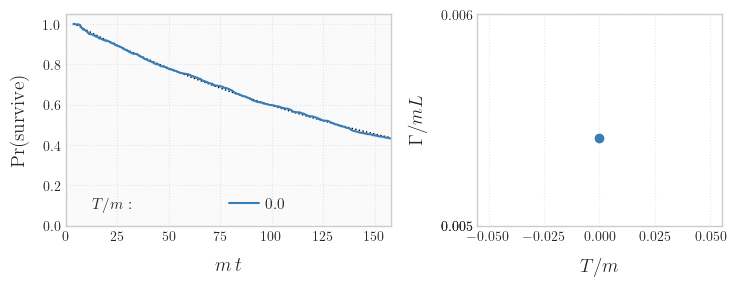

In [11]:
fig, ax = plt.subplots(1, 2, figsize = (7.5,3.), gridspec_kw={'width_ratios': [4, 3]})
gammas1 = np.zeros((2, 2))
cls = cycle(allcolors[:4])

for tmp in [0]:
    phi0, lamb, sigmafld, minSim, maxSim, right_Vmax, normal = get_model(tmp)
    exp_params = np.asarray([nLat, lamb, phi0, temp])
    labss = r'${}$'.format(round(temp/np.sqrt(m2(lamb)),1))#labl(lamb, phi0, temp)

    lmmax = lenLat*2
    lmmin = 0#lenLat/2

    decay_times = np.load(decay_times_file(*exp_params, minSim, maxSim, nTimeMAX))
    print(maxSim - minSim, len(decay_times))
    ndcys = maxSim - minSim
    decay_times = np.sort(decay_times[:,1]) * dx
    decay_times = decay_times[decay_times < lmmax]

    ax[0].fill_betweenx(np.linspace(0,2,10), lmmin*np.sqrt(m2(lamb)), lmmax*np.sqrt(m2(lamb)), color='darkgray', alpha=0.05)

    frmin = [np.argmin(np.abs(decay_times - lmmax))]
    frmax = [np.argmin(np.abs(decay_times - lmmin))]
    frmin = survive_prob(decay_times, ndcys)[frmin]
    frmax = survive_prob(decay_times, ndcys)[frmax]

    tmin = decay_times[np.argmin(np.abs(survive_prob(decay_times, ndcys) - frmax))]
    tmax = decay_times[np.argmin(np.abs(survive_prob(decay_times, ndcys) - frmin))]
    jfit_times   = lin_fit_times(decay_times, ndcys, tmin, tmax)
    gammas1[tmp] = np.array([temp, -jfit_times[0]])

    col = next(cls)
    ax[0].plot(decay_times*np.sqrt(m2(lamb)), np.exp(get_line(decay_times, *jfit_times)), ls=':', lw=1, color='k')
    ax[0].plot(decay_times*np.sqrt(m2(lamb)), survive_prob(decay_times, ndcys), color=col, ls='-', label=labss)

#temprange = np.linspace(tempList[0], tempList[3], 50)
#bounce_dat, pcov = get_best_bounce(tempList[:4], gammas1[:4,1]/np.sqrt(m2(lamb)))
#print('bounce_dat', bounce_dat)

#ax[1].plot(temprange/np.sqrt(m2(lamb)), fit_func_bounce(temprange, *bounce_dat), color='k', label=r'${\rm best \; fit\;} A \sqrt{\frac{E}{T}} e^{-E/T}$')

cls = cycle(allcolors[:4])
for tmp in [0]:
    phi0, lamb, sigmafld, minSim, maxSim, right_Vmax, normal = get_model(tmp)
    exp_params = np.asarray([nLat, lamb, phi0, temp])
    labss = r'${}$'.format(round(temp/np.sqrt(m2(lamb)),1))#labl(lamb, phi0, temp)

    col = next(cls)
    ax[1].plot(temp/np.sqrt(m2(lamb)), gammas1[tmp,1]/np.sqrt(m2(lamb)), color=col, marker='o', linestyle='none')

#ax[0].set_xscale('log')
ax[0].set_xlim(0, lmmax*np.sqrt(m2(lamb)))
ax[0].set_ylim(0., 1.05)
ax[0].set_ylabel(r'$\rm Pr(survive)$')
ax[0].set_xlabel(r'$m \, t$')

h, l = ax[0].get_legend_handles_labels() # Extracting handles and labels
handles = [plt.plot([],marker="", ls="")[0]]*2 + h
labels = [r'$T/m:$', ' '] + l  # Merging labels
leg = ax[0].legend(handles, labels, ncol=3, loc='lower left')#, markerfirst=False)

for vpack in leg._legend_handle_box.get_children()[:1]:
    for hpack in vpack.get_children(): hpack.get_children()[0].set_width(0)
for vpack in leg._legend_handle_box.get_children()[1:]:
    for hpack in vpack.get_children(): hpack.get_children()[0].set_width(17)
for vpack in leg._legend_handle_box.get_children()[:]:
    for hpack in vpack.get_children(): hpack.get_children()[0].set_height(0)
for vpack in leg._legend_handle_box.get_children()[:]:
    for hpack in vpack.get_children(): hpack.get_children()[0].set_offset([-10,0])

#ax[1].set_ylabel(r'$\frac{\phi_0^2 \Gamma}{V_0 L}$')
ax[1].set_ylabel(r'$\Gamma / m L$')
ax[1].set_xlabel(r'$T/m$')
ax[1].legend()
ax[0].grid(True, ls=':', color='lightgray', alpha=0.5)
ax[1].grid(True, ls=':', color='lightgray', alpha=0.5)
ax[0].tick_params(direction='in', which='both', top=True, right=True)
ax[1].tick_params(direction='in', which='both', top=True, right=True)

a = ax[1].get_yticks().tolist()[1:-1:2]
a = [round(al,3) for al in a]
ax[1].set_yticks(a)
a = [r'${:.3f}$'.format(al) for al in a]
ax[1].set_yticklabels(a)

fig.tight_layout()
plt.savefig('./plots/decay_rate_and_surv_fraction.pdf')
plt.show()

In [26]:
def get_stuffs(nsets):
    partdat = np.zeros((len(tmpList), nsets))
    for ii, average_bubble in enumerate(reversed(bubbleList)):
        tmp = tmpList[ii]
        phi0, lamb, sigmafld, minSim, maxSim, right_Vmax, normal = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])

        veldata = np.array(np.load(velocities_file(*exp_params)))
        simvels, all_vels = veldata[:,0].astype(int), veldata[:,1]

        pool = set(all_vels)
        means, vars = np.empty(nsets), np.empty(nsets)
        slen = int(round(len(pool) / nsets,1))
        for ss in range(nsets):
            velssec = random.sample(pool, slen)
            pool -= set(velssec)
            partdat[tmp,ss] = np.var(velssec)
    return partdat

ecrit, esph, varvel_meandat = np.zeros((3, len(tmpList)))
for ii, average_bubble in enumerate(reversed(bubbleList)):
    tmp = tmpList[ii]
    phi0, lamb, sigmafld, minSim, maxSim, right_Vmax, normal = get_model(tmp)
    exp_params = np.asarray([nLat, lamb, phi0, temp])

    veldata = np.array(np.load(velocities_file(*exp_params)))
    simvels, all_vels = veldata[:,0].astype(int), veldata[:,1]
    varvel_meandat[tmp] = np.var(all_vels)

    instanton  = instantonList[tmp]
    #xmax = np.amax(instanton)
    #xlist = np.linspace(xmax - len(instanton)//2, xmax + len(instanton)//2, len(instanton))
    gradinst   = (np.roll(instanton,-1) - instanton)/dx
    ecrit[tmp] = np.sum(0.5*gradinst**2. + V(instanton, lamb) - V(phieq,lamb))

    esph[tmp]  = encritList[tmp]

diffen = 2*np.pi*phi0**2.*dx

velsq_exp = lambda edt: 1. - edt - edt**2.* np.exp(edt) * scp.special.expi(-edt)
velsq_exp_explicit = lambda E,T: 1. - E/T - (E/T)**2.* np.exp(E/T) * scp.special.expi(-E/T)

sigma_avbub0 = 2.*tempList[tmpList] / (esph * diffen)
sigma_crit0  = 2.*tempList[tmpList] / (ecrit * diffen)
sigma_drate0 = 2.*tempList[tmpList] / (bounce_dat[-1])

sigma_avbub = velsq_exp( (esph * diffen) / tempList[tmpList] )
sigma_crit  = velsq_exp( (ecrit * diffen) / tempList[tmpList] )
sigma_drate = velsq_exp( (bounce_dat[-1]) / tempList[tmpList] )


/var/folders/y9/3fb45z893_907tsjq09bjhbh0000gn/T/ipykernel_41067/125881119.py:15: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  velssec = random.sample(pool, slen)


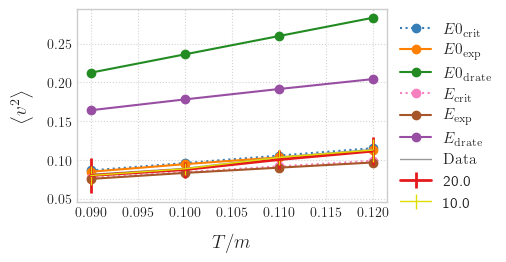

In [222]:
fig, ax = plt.subplots(1,1, figsize = (4,2.5))
ax.plot(tempList[tmpList], sigma_crit0, ls=':', marker='o', label=r'$E0_{\rm crit}$')
ax.plot(tempList[tmpList], sigma_avbub0, ls='-', marker='o', label=r'$E0_{\rm exp}$')
ax.plot(tempList[tmpList], sigma_drate0, ls='-', marker='o', label=r'$E0_{\rm drate}$')

ax.plot(tempList[tmpList], sigma_crit, ls=':', marker='o', label=r'$E_{\rm crit}$')
ax.plot(tempList[tmpList], sigma_avbub, ls='-', marker='o', label=r'$E_{\rm exp}$')
ax.plot(tempList[tmpList], sigma_drate, ls='-', marker='o', label=r'$E_{\rm drate}$')
ax.plot(tempList[tmpList], varvel_meandat, alpha=1, lw=1, label=r'$\rm Data$')

for nsets in reversed(np.linspace(10, 20, 2)):
    partdat = get_stuffs(int(nsets))
    ax.errorbar(tempList[tmpList], np.mean(partdat, axis=-1), yerr=np.std(partdat, axis=-1), \
                alpha=1, lw=nsets//10, label=nsets)

ax.legend(bbox_to_anchor=(1, 1))
ax.grid(ls=':', color='darkgray',alpha=0.5)
ax.set_xlabel(r'$T/m$')
ax.set_ylabel(r'$\left<v^2\right>$')
plt.show()


In [235]:
%run './bubbles_codes/plotting.py'

<Figure size 640x480 with 0 Axes>

/var/folders/y9/3fb45z893_907tsjq09bjhbh0000gn/T/ipykernel_41067/125881119.py:15: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  velssec = random.sample(pool, slen)


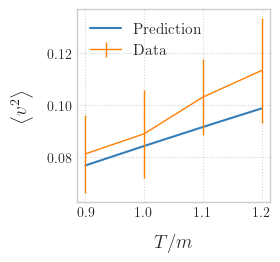

In [239]:
partdat = get_stuffs(15)

fig, ax = plt.subplots(1,1, figsize = (2.5,2.5))
ax.plot(tempList[tmpList]/m2(lamb)**0.5, sigma_crit, ls='-', label=r'$\rm Prediction$')
#ax.plot(tempList[tmpList]/m2(lamb)**0.5, sigma_crit0, ls='-', label=r'$\rm Prediction0$')
ax.errorbar(tempList[tmpList]/m2(lamb)**0.5, varvel_meandat, yerr=np.std(partdat, axis=-1), alpha=1, lw=1, label=r'$\rm Data$')

a = ax.get_xticks().tolist()[1:-1:]
a = [round(al,1) for al in a]
ax.set_xticks(a)
a = [r'${:.1f}$'.format(al) for al in a]
ax.set_xticklabels(a)
a = ax.get_yticks().tolist()[1:-1:]
a = [round(al,2) for al in a]
ax.set_yticks(a)
a = [r'${:.2f}$'.format(al) for al in a]
ax.set_yticklabels(a)

ax.tick_params(direction='in', which='both', top=True, right=True)

ax.legend(loc=2)
ax.grid(ls=':', color='darkgray',alpha=0.5)
ax.set_xlabel(r'$T/m$')
ax.set_ylabel(r'$\left<v^2\right>$')
plt.savefig('./plots/comparison_vels_var.pdf'); plt.show()


In [240]:
def f_inv_velsq_exp_explicit(x, ii):
    return abs(velsq_exp_explicit(x, tempList[tmpList][ii]) - varvel_meandat[ii])

enfromvels = np.zeros((len(varvel_meandat)))
for ii in range(len(varvel_meandat)):
    out = sco.minimize_scalar(f_inv_velsq_exp_explicit, bounds=((0,None)), args=(ii))
    enfromvels[ii] = out.x


/var/folders/y9/3fb45z893_907tsjq09bjhbh0000gn/T/ipykernel_41067/125881119.py:41: RuntimeWarning: invalid value encountered in double_scalars
  velsq_exp_explicit = lambda E,T: 1. - E/T - (E/T)**2.* np.exp(E/T) * scp.special.expi(-E/T)


/var/folders/y9/3fb45z893_907tsjq09bjhbh0000gn/T/ipykernel_41067/3459377188.py:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


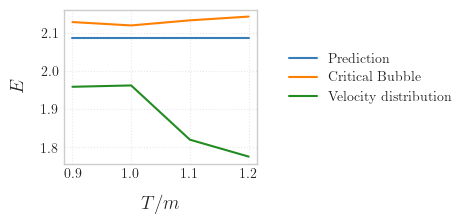

In [334]:
# Plot to compare all energies 

fig, ax = plt.subplots(1, 1, figsize = (2.5,2.))
ax.plot(tempList[tmpList]/np.sqrt(m2(lamb)), ecrit*diffen, label=r'$\rm Prediction$')
ax.plot(tempList[tmpList]/np.sqrt(m2(lamb)), esph*diffen, label=r'$\rm Critical \; Bubble$')

ax.plot(tempList[tmpList]/np.sqrt(m2(lamb)), enfromvels, label=r'$\rm Velocity \; distribution$')

#ax.plot(tempList[tmpList]/np.sqrt(m2(lamb)), bounce_dat[-1]*np.ones(len(tmpList)), label=r'$\rm Decay \; rate$')

#ax.set_yscale('log')

a = ax.get_xticks().tolist()[1:-1:]
a = [round(al,1) for al in a]
ax.set_xticks(a)
a = [r'${:.1f}$'.format(al) for al in a]
ax.set_xticklabels(a)

ax.set_ylabel(r'$E$')
ax.set_xlabel(r'$T/m$')
ax.legend(fontsize=10, bbox_to_anchor=(1.1,0.8))
plt.grid(True, ls=':', color='lightgray', alpha=0.5)
plt.tight_layout()
plt.savefig('./plots/critenergy_comparison.pdf')
plt.show()

In [338]:
np.sqrt(m2(lamb))

0.1

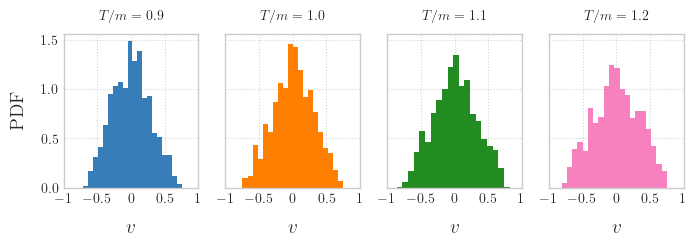

In [204]:
fig, ax = plt.subplots(1,4, figsize = (8,2), sharey='row')
cols = cycle(allcolors[:4])
for ii, average_bubble in enumerate(reversed(bubbleList)):
    tmp = tmpList[ii]
    phi0, lamb, sigmafld, minSim, maxSim, right_Vmax, normal = get_model(tmp)
    exp_params = np.asarray([nLat, lamb, phi0, temp])
    labss = r'$T/m = {}$'.format(round(temp/np.sqrt(m2(lamb)),1))#labl(lamb, phi0, temp)

    veldata = np.array(np.load(velocities_file(*exp_params)))
    simvels, all_vels = veldata[:,0].astype(int), veldata[:,1]

    col = next(cols)
    ax[ii].hist(all_vels, bins=20, alpha=1, color=col, density=True)#, label=labss)

    mu = 0.
    xlist = np.linspace(-1.,1.,1000)
#    ax.plot(xlist, scp.stats.norm.pdf(xlist, mu, sigma_avbub[tmp]**0.5), ls='-', color=col)

    meanvel, varvel = np.mean(all_vels), np.std(all_vels)
#    ax.plot(xlist, scp.stats.norm.pdf(xlist, meanvel, varvel), color=col, label=labss)#r'$\rm Data$')

    a = ax[ii].get_xticks().tolist()[1:-1:]
    a = np.linspace(-1, 1, 5)
    a[::2] = np.array(a[::2], dtype='int')
    ax[ii].set_xticks(a)
    b = [r'${:.1f}$'.format(al) for al in a]
    b[::2] = [r'${:.0f}$'.format(al) for al in a[::2]]
    ax[ii].set_xticklabels(b)
    ax[ii].grid(ls=':', color='darkgray',alpha=0.5)
    ax[ii].set_xlabel(r'$v$')
    ax[ii].set_title(labss, fontsize=10)
    ax[ii].tick_params(direction='in', which='both', top=True, right=True)

a = ax[0].get_yticks().tolist()[:-1:]
a = [round(al,2) for al in a]
ax[0].set_yticks(a)
b = [r'${:.1f}$'.format(al) for al in a]
ax[0].set_yticklabels(b)
ax[0].set_ylabel(r'$\rm PDF$')


plt.savefig('./plots/comparison_vels_PDF.pdf'); plt.show()


In [96]:
for ii, average_bubble in enumerate(reversed(bubbleList)):
    tmp = tmpList[ii]
    phi0, lamb, sigmafld, minSim, maxSim, right_Vmax, normal = get_model(tmp)
    exp_params = np.asarray([nLat, lamb, phi0, temp])

    decay_times = np.load(decay_times_file(*exp_params, minSim, maxSim, nTimeMAX))
    print('N1 = ', len(decay_times))

    minDecTime  = nLat*2//3
    alltimes    = decay_times[:,1]
    simList2Do  = decay_times[alltimes>=minDecTime, 0]
    n2Do        = len(simList2Do)
    print('N2 = ', n2Do)

    veldata = np.array(np.load(velocities_file(*exp_params)))
    simvels, all_vels = veldata[:,0].astype(int), veldata[:,1]
    
    print('N3 = ', len(all_vels))
 #   print(temp, len(all_vels), np.count_nonzero(all_vels > 0.)/len(all_vels))
  #  print(temp, np.count_nonzero(np.abs(all_vels) > 0.5)/len(all_vels))

N1 =  1003
N2 =  665
N3 =  654
N1 =  2192
N2 =  1199
N3 =  1191
N1 =  3165
N2 =  1280
N3 =  1266
N1 =  3711
N2 =  882
N3 =  854


In [11]:
import celluloid
from celluloid import Camera

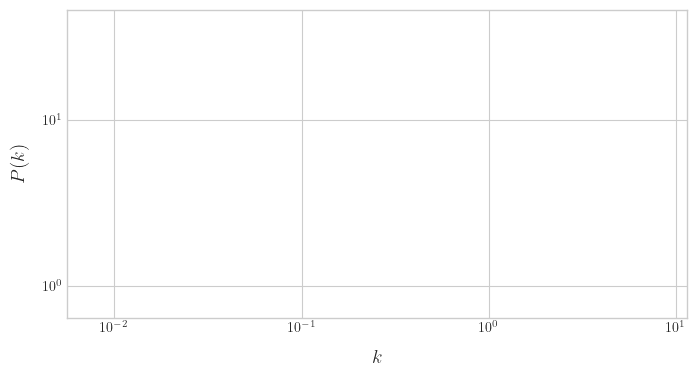

In [10]:
if False:
    tlist2 = np.arange(0, nTimeMAX, 10)
    for tmp in [0]:
        phi0, lamb, sigmafld, minSim, maxSim, right_Vmax, normal = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])

        # 0 for field; 1 for momentum 
        find = 0
        # modes to plot:
        aa, bb = 1, knyq-1
        labs = labl(lamb, phi0, temp)
        psth = pspec(lamb, phi0, temp)[aa:bb]

        ALL_powspec0 = np.load(powspec_tlist_file(*exp_params, minSim, 100))
        ALL_powspec1 = np.load(powspec_tlist_file(*exp_params, 100, 200))
        ALL_powspec2 = np.load(powspec_tlist_file(*exp_params, 200, 300))
        ALL_powspec3 = np.load(powspec_tlist_file(*exp_params, 300, 400))
        ALL_powspec4 = np.load(powspec_tlist_file(*exp_params, 400, 500))
        ALL_powspec5 = np.load(powspec_tlist_file(*exp_params, 500, 600))
        ALL_powspec6 = np.load(powspec_tlist_file(*exp_params, 600, 700))
        ALL_powspec7 = np.load(powspec_tlist_file(*exp_params, 700, 800))
        ALL_powspec8 = np.load(powspec_tlist_file(*exp_params, 800, 900))
        ALL_powspec9 = np.load(powspec_tlist_file(*exp_params, 900, maxSim))

        fig, ax = plt.subplots(1,1, figsize = (8,4))
        camera = Camera(fig)
        for tind, tt in enumerate(tlist2):

            avPSfld0 = np.nanmean(ALL_powspec0[:, find, tind, :], axis=0)
            avPSfld1 = np.nanmean(ALL_powspec1[:, find, tind, :], axis=0)
            avPSfld2 = np.nanmean(ALL_powspec2[:, find, tind, :], axis=0)
            avPSfld3 = np.nanmean(ALL_powspec3[:, find, tind, :], axis=0)
            avPSfld4 = np.nanmean(ALL_powspec4[:, find, tind, :], axis=0)
            avPSfld5 = np.nanmean(ALL_powspec5[:, find, tind, :], axis=0)
            avPSfld6 = np.nanmean(ALL_powspec6[:, find, tind, :], axis=0)
            avPSfld7 = np.nanmean(ALL_powspec7[:, find, tind, :], axis=0)
            avPSfld8 = np.nanmean(ALL_powspec8[:, find, tind, :], axis=0)
            avPSfld9 = np.nanmean(ALL_powspec9[:, find, tind, :], axis=0)
            avPSfld  = np.nanmean(np.array([avPSfld0, avPSfld1, avPSfld2, avPSfld3, avPSfld4, \
                                            avPSfld5, avPSfld6, avPSfld7, avPSfld8, avPSfld9]), axis=0)
            slice = plt.plot(klist[aa:bb], avPSfld[aa:bb]/psth, ls='-', color='purple')

            ax.set_xscale('log')
            ax.set_yscale('log')
            ax.set_ylabel(r'$P(k)$')
            ax.set_xlabel(r'$k$')
            ax.legend(slice, [f't = {tt}'], loc=1, title=labs)
            camera.snap()
        animation = camera.animate(interval = 0.05);
        animation.save('./plots/animation_cut_PS'+batch_params(*exp_params)+'.gif', writer = 'imagemagick')


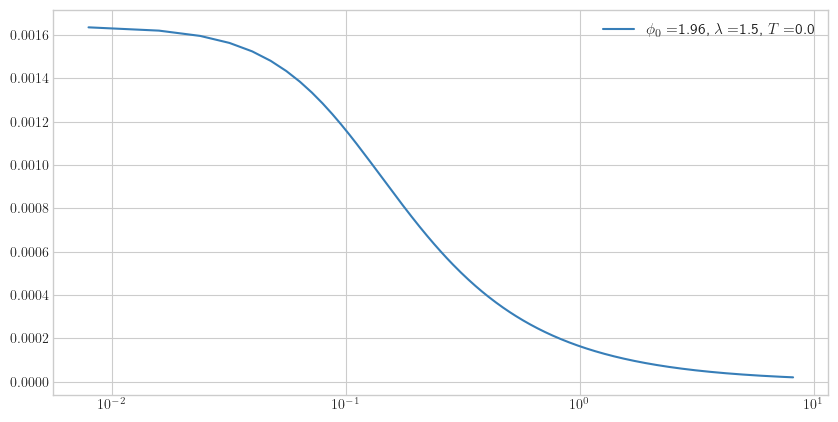

In [12]:
fig, ax = plt.subplots(1,1, figsize = (10,5))
for tmp in [0]:
    phi0, lamb, sigmafld, minSim, maxSim, right_Vmax, normal = get_model(tmp)
    exp_params = np.asarray([nLat, lamb, phi0, temp])

    aa, bb = 1, knyq-1
    plt.plot(klist[aa:bb], pspec(lamb, phi0, temp)[aa:bb], ls=lsl(tmp), label = labl(lamb, phi0, temp)) # th pow spec
plt.xscale('log')
plt.legend(); plt.show()

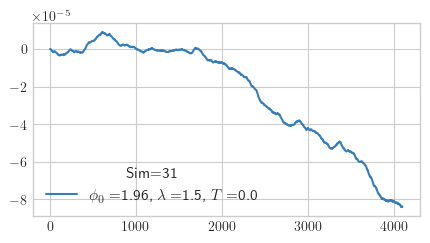

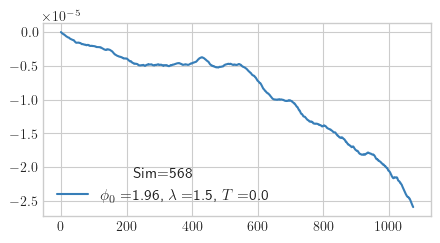

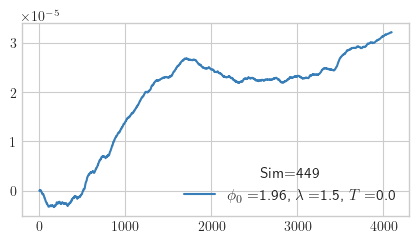

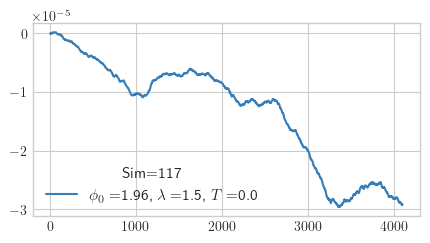

In [18]:
if True:
    tlist1 = np.arange(0, nTimeMAX, 1)
    choose = random.sample(np.arange(maxSim).tolist(), 4)
    for sim in choose:
    
        fig, ax = plt.subplots(1,1, figsize = (5,2.5))
        for tmp in [0]:
            phi0, lamb, sigmafld, minSim, maxSim, right_Vmax, normal = get_model(tmp)
            exp_params = np.asarray([nLat, lamb, phi0, temp])

            hundo = np.round(sim, -2)
            ALL_toten = np.load(toten_tlist_file(*exp_params, hundo, hundo+100))
            #tlist, energy = ALL_toten[0], ALL_toten[1][sim-hundo]
            energy = ALL_toten[sim-hundo]

            try: nnrg = np.argwhere(np.isnan(energy)).flatten()[0]
            except: nnrg = len(tlist1)

            tcut, tencut = tlist1[:nnrg], energy[:nnrg]
            tencut = (tencut - tencut[0]) / tencut[0]
            plt.plot(tcut, tencut, label=labl(lamb, phi0, temp))
        plt.legend(title='Sim='+str(sim))
        plt.show()


In [15]:
if True:
    for tmp in [0]:
        phi0, lamb, sigmafld, minSim, maxSim, right_Vmax, normal = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])
        labs = labl(lamb, phi0, temp)
        
        ALL_toten = np.load(toten_tlist_file(*exp_params, minSim, maxSim))
        ALL_emt   = np.load(emt_tlist_file(*exp_params, minSim, maxSim))

        tlist, enfld, emtfld  = ALL_toten[0], ALL_toten[1], ALL_emt[1]

        fig2, ax = plt.subplots(1, 1, figsize=(7, 3.5))
        for sim, (momentum, energy) in enumerate(zip(emtfld, enfld)):
            if sim!=0: continue

            try: nnrg = np.argwhere(np.isnan(energy)).flatten()[0]
            except: nnrg = len(tlist)+1

            tcut, emtcut, tencut = tlist[:nnrg], momentum[:nnrg], energy[:nnrg]
            emtcut = (emtcut - emtcut[0]) / emtcut[0]
            tencut = (tencut - tencut[0]) / tencut[0]

            ax.plot(tcut, tencut, label=(r'$T^{00}$' if sim==0 else None))
        #    ax.plot(tcut, emtcut, label=(r'$T^{0x}$' if sim==0 else None))

        ax.set_xlabel(r'$\phi_0^{-1} \sqrt{V_0} \; t$')
        ax.set_ylabel(r'$T^{00}, \; T^{0x}$')
        ax.legend(title=labs); ax.grid(ls=':', color='darkgray', alpha=0.3)
        ax.set_title(labs)
        fig2.show()

FileNotFoundError: [Errno 2] No such file or directory: '/gpfs/dpirvu/vacuum_potential/x2048_phi01.9635_lambda1.5000_T0.0000_minSim0_maxSim1000_toten.npy'

In [54]:
if False:
    fig, ax = plt.subplots(1, 1, figsize=(3.5, 2.5))
    allcs = cycle(allcolors)
    for tmp in reversed([0]):

        phi0, lamb, sigmafld, minSim, maxSim, right_Vmax, normal = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])
        labss = r'${}$'.format(round(temp/np.sqrt(m2(lamb)),1))#labl(lamb, phi0, temp)
        col = next(allcs)

        veldata = np.array(np.load(velocities_file(*exp_params)))
        simvels, all_vels = veldata[:,0].astype(int), veldata[:,1]

        ALL_emt = np.load(emt_tlist_file(*exp_params, minSim, maxSim))
        initemt    = ALL_emt[simvels,0]

        #emtfld = np.load(stdemt0_tlist_file(*exp_params, minSim, maxSim))
        #initemt    = emtfld[simvels]

        ax.plot(all_vels, -initemt, marker='o', ms=2, linestyle='None', label=labss, color=col)
 
        f = lambda x, A: x/A
        pbf, pcov = sco.curve_fit(f, all_vels, -initemt) # your data x, y to fit
        ax.plot(all_vels, f(all_vels, *pbf), color='k', linewidth=1)
    
    ax.set_xlim(-1,1)
  #  ax.set_ylim(-1,1)
    ax.set_xlabel(r'$v_{\rm COM}$')
#    ax.set_ylabel(r'$\int \mathrm{d} r \, \Pi \, \partial_r \varphi$')
    ax.set_ylabel(r'$\bar{P}$')
    ax.grid(ls=':', color='darkgray', alpha=0.3)

    leg = ax.legend(title=r'$T/m:$', ncol=1, loc='best', fontsize=10, bbox_to_anchor=(1, 0.8))

    if True:
        a = ax.get_yticks().tolist()[2:-1:2]
        a = [round(al,2) for al in a]
        ax.set_yticks(a)
     #   a[::2] = [int(al) for al in a[::2]]
     #   b = [r'${:.1f}$'.format(al) for al in a]
     #   b[::2] = [r'${:.0f}$'.format(al) for al in a[::2]]
     #   ax.set_yticklabels(b)

    a = ax.get_xticks().tolist()
    a = [round(al,2) for al in a]
    ax.set_xticks(a)
    a[::2] = [int(al) for al in a[::2]]
    b = [r'${:.1f}$'.format(al) for al in a]
    b[::2] = [r'${:.0f}$'.format(al) for al in a[::2]]
    ax.set_xticklabels(b)

    plt.savefig('./plots/initial_emt_vs_vel.pdf')
    fig.show()


In [55]:
if False:
    fig, ax = plt.subplots(1, 1, figsize=(5, 4))
    allcs = cycle(allcolors)
    for tmp in reversed([0]):

        phi0, lamb, sigmafld, minSim, maxSim, right_Vmax, normal = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])
        labss = r'${}$'.format(round(temp/np.sqrt(m2(lamb)),1))#labl(lamb, phi0, temp)
        col = next(allcs)

        veldata = np.array(np.load(velocities_file(*exp_params)))
        simvels, all_vels = veldata[:,0].astype(int), veldata[:,1]

        ALL_emt1 = np.load(emt_tlist_file(*exp_params, minSim, 2000))
        ALL_emt2 = np.load(emt_tlist_file(*exp_params, 2000, maxSim))
        emtfld = np.concatenate((ALL_emt1[1], ALL_emt2[1]), axis=0)
        initemt    = emtfld[simvels,0]

        # fit a straight line
        jfit_times = np.polyfit(all_vels, -initemt, deg=1)
        print(jfit_times)
        vlist = np.linspace(0., 1, 100)
        ax.plot(vlist, get_line(vlist, *jfit_times), '-', label=labss, color=col)

    ax.legend(title=r'$T/m {\rm \; best \; fit}$', loc='best', ncol=2)
    ax.set_xlabel(r'$v_{\rm COM}$')
    ax.set_ylabel(r'$\bar{P}$')
    ax.grid(ls=':', color='darkgray', alpha=0.3)
    fig.show()


In [40]:
if False:
    for tmp in reversed([0]):
        
        phi0, lamb, sigmafld, minSim, maxSim, right_Vmax, normal = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])

        path = decay_times_file(*exp_params, minSim, maxSim, nTimeMAX)
        if os.path.exists(path):
            print(path)
            decay_times = np.load(path)

            minDecTime = nLat*2//3
            alltimes   = decay_times[:,1]
            simList2Do = decay_times[alltimes>=minDecTime, 0]

            all_vels = []
            for sim in simList2Do:
                path2RESTsim = rest_sim_location(*exp_params, sim)
                if os.path.exists(path2RESTsim):

                    sim, bubble, totbeta = np.load(path2RESTsim)
                    all_vels.append(np.array([sim, totbeta]))

        np.save(velocities_file(*exp_params), all_vels)
        print(len(all_vels), len(simList2Do))
        print('Done!')

0.12 854
0.11 1266
0.1 1191
0.09 654


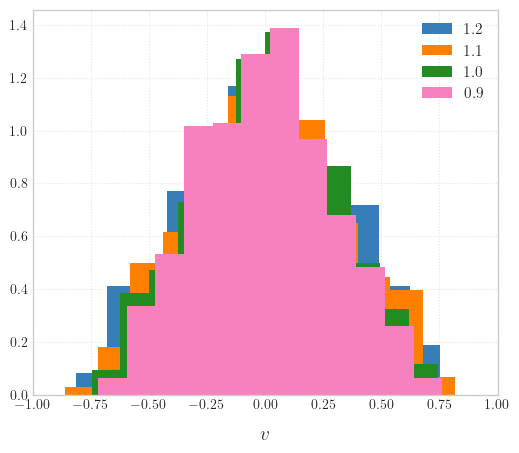

In [41]:
if True:
    fig2, ax = plt.subplots(1, 1, figsize=(6, 5))
    plt.grid(True, ls=':', alpha=0.5)
    for tmp in reversed([0]):
    
        phi0, lamb, sigmafld, minSim, maxSim, right_Vmax, normal = get_model(tmp)
        exp_params = np.asarray([nLat, lamb, phi0, temp])
        labss = r'${}$'.format(round(temp/np.sqrt(m2(lamb)),1))#labl(lamb, phi0, temp)

        veldata = np.load(velocities_file(*exp_params))
     
        simvels, all_vels = veldata[:,0].astype(int), veldata[:,1]
        print(temp, len(simvels))
        plt.hist(all_vels, bins=12, label=labss, density=True)
    plt.xlim((-1,1))
    plt.legend(title=r'$T/m$', ncol=1, loc='best')
    plt.xlabel(r'$v$')
    plt.legend()
    plt.show()